In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%load_ext version_information
%version_information numpy, dlib, matplotlib, imageio, gaze, torch, torchvision

Software,Version
Python,3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
IPython,7.0.1
OS,Darwin 17.7.0 x86_64 i386 64bit
numpy,1.15.3
dlib,19.16.0
matplotlib,3.0.0
imageio,2.4.1
gaze,The 'gaze' distribution was not found and is required by the application
torch,0.4.1
torchvision,0.2.1


## loading the model

In [3]:
from gaze import init, ML
args = init(no_cuda=True, batch_size=64, verbose=0)
ml = ML(args)
path = '_Regard.pt'
ml.train(path=path)

Loading file _Regard.pt


In [4]:
ml.device

device(type='cpu')

## running the forward model on the extracted faces

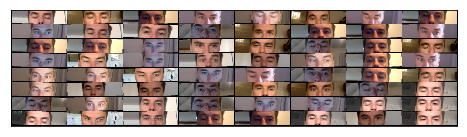

In [5]:
%matplotlib inline
fig, ax =  ml.dataset.show()

In [6]:
for batch_idx, (data, target) in enumerate(ml.dataset.train_loader):
    data, target = data.to(ml.device), target.to(ml.device)
    output = ml.model(data)

## testing the model

In [7]:
Accuracy = ml.test()
print('Accuracy={:.1f}%'.format(Accuracy*100))

Accuracy=98.6%


In [8]:
data, labels = next(iter(ml.dataset.train_loader))
print(' '.join('%5s' % ml.dataset.dataset.classes[labels[j]] for j in range(ml.args.batch_size)))

blink blink center center blink center blink  left  left blink right  left right right right center blink  left right  left right blink blink blink center  left right  left blink  left right  left right center  left right blink  left blink blink  left  left  left right center center blink blink blink right  left  left right blink blink right blink  left right blink  left right center  left


In [9]:
fig, ax = ml.show(only_wrong=True)

RuntimeError: bool value of Tensor with more than one value is ambiguous

In [10]:
fig, ax = ml.show(only_wrong=False)

## cross-validation

In [14]:
import os
fname = 'figures/accuracy'
if not os.path.exists(fname + '.pdf'):
    args = init(verbose=0, log_interval=0, epochs=20)
    from gaze import MetaML
    mml = MetaML(args)
    Accuracy = mml.protocol(args, 42)
    print('Accuracy', Accuracy[:-1].mean(), '+/-', Accuracy[:-1].std())

    %matplotlib inline
    import matplotlib.pyplot as plt
    import numpy as np
    fig, ax = plt.subplots(figsize=((8, 5)))
    n, bins, patches = ax.hist(Accuracy[:-1]*100, bins=np.linspace(0, 100, 100), alpha=.4)
    ax.vlines(np.median(Accuracy[:-1])*100, 0, n.max(), 'g', linestyles='dashed', label='median')
    ax.vlines(25, 0, n.max(), 'r', linestyles='dashed', label='chance level')
    ax.vlines(100, 0, n.max(), 'k', label='max')
    ax.set_xlabel('Accuracy (%)')
    ax.set_ylabel('Smarts')
    ax.legend(loc='best')
    plt.show() 
    for ext in ['.pdf', '.png']:
        plt.savefig(fname + ext)

FileNotFoundError: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 106, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/usr/local/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 106, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/usr/local/lib/python3.6/site-packages/torch/utils/data/dataset.py", line 103, in __getitem__
    return self.dataset[self.indices[idx]]
  File "/usr/local/lib/python3.6/site-packages/torchvision/datasets/folder.py", line 101, in __getitem__
    sample = self.loader(path)
  File "/usr/local/lib/python3.6/site-packages/torchvision/datasets/folder.py", line 147, in default_loader
    return pil_loader(path)
  File "/usr/local/lib/python3.6/site-packages/torchvision/datasets/folder.py", line 128, in pil_loader
    with open(path, 'rb') as f:
FileNotFoundError: [Errno 2] No such file or directory: 'dataset_faces/blink/2018-10-18_Laurent_200.png'


In [ ]:
from IPython.display import Image
Image(filename=fname + '.png') 